In [1]:
import numpy as np
import numpy.random as rnd
import os
import matplotlib
import matplotlib.pyplot as plt

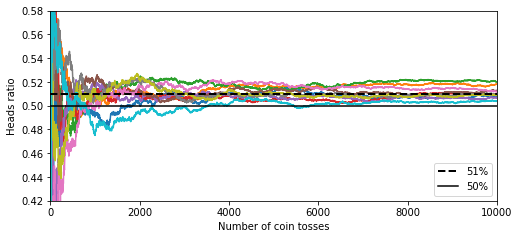

In [2]:
# Voting Classifiers

heads_proba = 0.51
coin_tosses = (rnd.rand(10000, 10) < heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1, 10001).reshape(-1, 1)

plt.figure(figsize=(8,3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])
plt.show()

In [3]:
#---------------------------------------------------------------------------------------
#  Make_moons DataSet
# page 244
#---------------------------------------------------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
         estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
         voting='hard')

voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('\n{}: {}\n\n'.format(clf.__class__.__name__, accuracy_score(y_test, y_pred)))


LogisticRegression: 0.864



RandomForestClassifier: 0.88



SVC: 0.888



VotingClassifier: 0.88




C:\Users\smart\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\smart\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\smart\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\smart\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\smart\Anaconda3\lib\site-packages\sklearn

In [5]:
#---------------------------------------------------------------------------------------
#  Bagging and Pasting
#  500개의 Tree, 각 Tree는 100개의 Sample Data
#  page 246
#---------------------------------------------------------------------------------------
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
                 DecisionTreeClassifier(), n_estimators=500,
                 max_samples=100, bootstrap=True)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print('\naccuracy_score(Bagging Classifier) = {}\n\n'.format(accuracy_score(y_test, y_pred)))

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print('\naccuracy_score(DecisionTreeClassifier) = {}\n\n'.format(accuracy_score(y_test, y_pred_tree)))


accuracy_score(Bagging Classifier) = 0.904



accuracy_score(DecisionTreeClassifier) = 0.856




In [6]:
# Pasting
#
past_clf = BaggingClassifier(
                 DecisionTreeClassifier(), n_estimators=500,
                 max_samples=100, bootstrap=False)

past_clf.fit(X_train, y_train)
y_pred = past_clf.predict(X_test)
print('\naccuracy_score(Pasting Classifier) = {}\n\n'.format(accuracy_score(y_test, y_pred)))

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print('\naccuracy_score(DecisionTreeClassifier) = {}\n\n'.format(accuracy_score(y_test, y_pred_tree)))


accuracy_score(Pasting Classifier) = 0.912



accuracy_score(DecisionTreeClassifier) = 0.856




In [7]:
#---------------------------------------------------------------------------------------
#  Decision Boundary
#  Decision TRee vs Bagging Ensemble(#of Trees=500개, # of Samples=100)
#  page 247
#---------------------------------------------------------------------------------------
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
     x1s = np.linspace(axes[0], axes[1], 100)
     x2s = np.linspace(axes[2], axes[3], 100)
     x1, x2 = np.meshgrid(x1s, x2s)
     X_new = np.c_[x1.ravel(), x2.ravel()]
     y_pred = clf.predict(X_new).reshape(x1.shape)
     custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
     plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)
     if contour:
         custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
         plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
     plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
     plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
     plt.axis(axes)
     plt.xlabel(r"$x_1$", fontsize=18)
     plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

C:\Users\smart\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app
C:\Users\smart\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


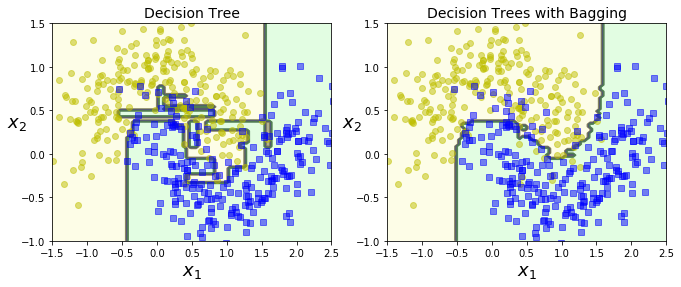

In [8]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()

In [9]:
#---------------------------------------------------------------------------------------
#  odd 평가와 accuracy_score의 비교
#  page 248
#---------------------------------------------------------------------------------------
bag_clf = BaggingClassifier(
         DecisionTreeClassifier(), n_estimators=500,
         bootstrap=True, oob_score=True)

bag_clf.fit(X_train, y_train)
print('\nodd_score_BaggingClassifier = {}\n\n'.format(bag_clf.oob_score_))

from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score = accuracy_score(y_test, y_pred)
print('\naccuracy_score = {}\n\n'.format(accuracy_score))


odd_score_BaggingClassifier = 0.9013333333333333



accuracy_score = 0.904




# 랜덤포레스트 =========

In [10]:
#---------------------------------------------------------------------------------------
#  RandomForestClassifier
#  page 250
#---------------------------------------------------------------------------------------
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)


score(sepal length (cm)) = 0.104630664734167



score(sepal width (cm)) = 0.023783144120248373



score(petal length (cm)) = 0.43734206793512226



score(petal width (cm)) = 0.4342441232104623




C:\Users\smart\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app
C:\Users\smart\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app
C:\Users\smart\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app
C:\Users\smart\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app
C:\Users\smart\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app
C:\Users\smart\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The foll

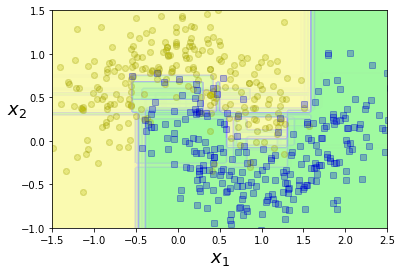

In [11]:
#---------------------------------------------------------------------------------------
#  RandomForestClassifier: 특성중요도
#  iris Dataset
#  page 252
#---------------------------------------------------------------------------------------
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500)
rnd_clf.fit(iris['data'], iris['target'])

for name, score in zip(iris['feature_names'], rnd_clf.feature_importances_):
    print('\nscore({}) = {}\n\n'.format(name, score))


plt.figure(figsize=(6, 4))
for i in range(15):
     tree_clf = DecisionTreeClassifier(max_leaf_nodes=16, random_state=42+i)
     indices_with_replacement = rnd.randint(0, len(X_train), len(X_train))
     tree_clf.fit(X[indices_with_replacement], y[indices_with_replacement])
     plot_decision_boundary(tree_clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.02, contour=False)
plt.show()

C:\Users\smart\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


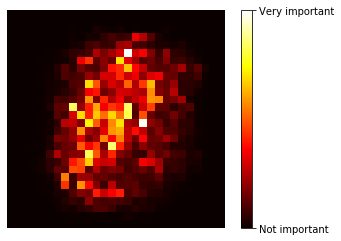

In [12]:
#---------------------------------------------------------------------------------------
#  RandomForestClassifier: MNIST 데이터의 특성중요도
#  mnist Dataset
#  page 253
#---------------------------------------------------------------------------------------
#from sklearn.datasets import fetch_mldata
#mnist = fetch_mldata('MNIST original')

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

def plot_digit(data):
     image = data.reshape(28, 28)
     plt.imshow(image, cmap = matplotlib.cm.hot,
                interpolation="nearest")
     plt.axis("off")


plot_digit(rnd_clf.feature_importances_)
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()

C:\Users\smart\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\smart\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app
C:\Users\smart\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
C:\Users\smart\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The def

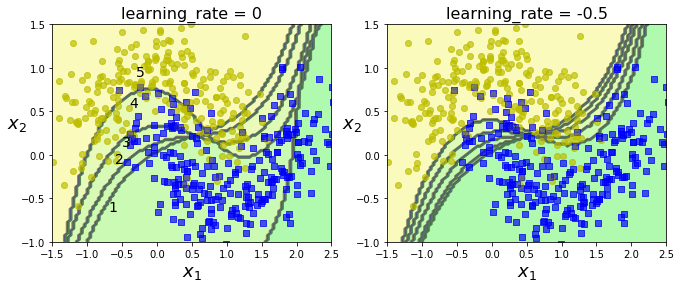

In [13]:
#---------------------------------------------------------------------------------------
# AdaBoost
#  page 255
#---------------------------------------------------------------------------------------

m = len(X_train)

plt.figure(figsize=(11, 4))
for subplot, learning_rate in ((121, 1), (122, 0.5)):
     sample_weights = np.ones(m)
     for i in range(5):
         plt.subplot(subplot)
         svm_clf = SVC(kernel="rbf", C=0.05)
         svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
         y_pred = svm_clf.predict(X_train)
         sample_weights[y_pred != y_train] *= (1 + learning_rate)
         plot_decision_boundary(svm_clf, X, y, alpha=0.2)
         plt.title("learning_rate = {}".format(learning_rate -1), fontsize=16)

plt.subplot(121)
plt.text(-0.7, -0.65, "1", fontsize=14)
plt.text(-0.6, -0.10, "2", fontsize=14)
plt.text(-0.5,  0.10, "3", fontsize=14)
plt.text(-0.4,  0.55, "4", fontsize=14)
plt.text(-0.3,  0.90, "5", fontsize=14)
plt.show()

C:\Users\smart\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


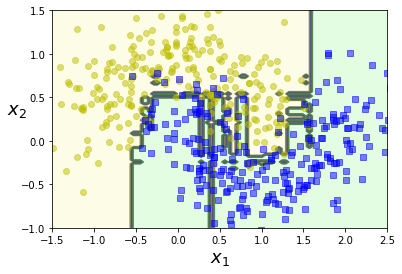

In [14]:
#---------------------------------------------------------------------------------------
# AdaBoost
#  page 257
#---------------------------------------------------------------------------------------
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
         DecisionTreeClassifier(max_depth=2), n_estimators=200,
         algorithm="SAMME.R", learning_rate=0.5, random_state=42
     )
ada_clf.fit(X_train, y_train)
plot_decision_boundary(ada_clf, X, y)
plt.show()

In [15]:
#---------------------------------------------------------------------------------------
# Gradient Boosting
#  page 258
#---------------------------------------------------------------------------------------

from sklearn.tree import DecisionTreeRegressor
import numpy.random as rnd

rnd.seed(42)
X = rnd.rand(100, 1) - 0.5  # 1 dimension 짜리 100개
y = 3*X[:, 0]**2 + 0.05 * rnd.randn(100)

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

y2 = y - tree_reg1.predict(X)  # Residual을 게산
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)  # Resudual을 DecisionTree로 Fitting

y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
print('\ny_prediction([{}]) = {}\n\n'.format(X_new, y_pred))


y_prediction([[[0.8]]]) = [0.75026781]




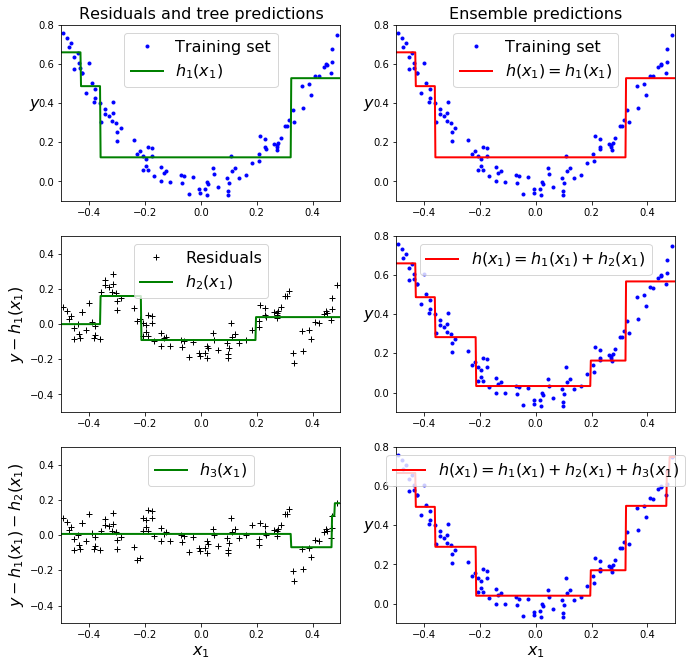

In [16]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
     x1 = np.linspace(axes[0], axes[1], 500)
     y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
     plt.plot(X[:, 0], y, data_style, label=data_label)
     plt.plot(x1, y_pred, style, linewidth=2, label=label)
     if label or data_label:
         plt.legend(loc="upper center", fontsize=16)
     plt.axis(axes)
plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.show()

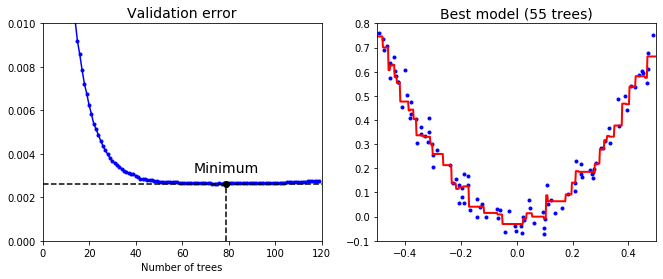

In [17]:
#---------------------------------------------------------------------------------------
# Optimal Stopping Rules
#  page 261
#---------------------------------------------------------------------------------------
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y)
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, learning_rate=0.1, random_state=42)
gbrt.fit(X_train, y_train)
errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]

best_n_estimators = np.argmin(errors)
min_error = errors[best_n_estimators]

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimators, learning_rate=0.1, random_state=42)
gbrt_best.fit(X_train, y_train)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([best_n_estimators, best_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(best_n_estimators, min_error, "ko")
plt.text(best_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (55 trees)", fontsize=14)
plt.show()